In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)

# Numerical Integration Investigation

In this example, we will investigate a few different methods of numerical integration.  We will use the following function as our test case:

$$y = \frac{3}{2}(1-x^2)$$

We will integrate this function from $x=0$ to $x=1$.

The exact value of the integral is:

$$\int_0^1 y dx = 1$$

In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

## Trapezoidal Rule

The next simplest of numerical integration is the trapezoidal rule.  In this method, we divide the interval into $n$ equal parts, and evaluate the function at the endpoints of each interval.  The area of each trapezoid is then the average of the function values at the endpoints times the width of the interval.  The total area is the sum of the areas of all the trapezoids.  The error in this method is proportional to the width of the interval squared, so the error decreases as $n$ increases.  The error is also proportional to the second derivative of the function, so the error decreases as the function becomes smoother.

We will consider n values of $n$ from $10^2$ to $10^6$.

In [3]:
max_order = 6
min_order = 2
Iexact = 1.0

norders = max_order - min_order + 1

npts = np.zeros(norders)

enp = np.zeros(norders)
sum2 = np.zeros(norders)
esum2 = np.zeros(norders)

for j in range(min_order,max_order+1):
    npoints = 10**j
    # array to hold number of points
    npts[j-min_order]=npoints

    xlow = 0.0
    xhigh = 1.0
    dx = (xhigh-xlow)/npoints
        
    for i in range(0,int(npoints-1)): # Note that for the trapezoidal rule, we need to evaluate the function at the endpoints of each interval,
                                      # so we only go to n-1
        x0 = xlow + i*dx
        x1 = x0 + dx
        y0 = generator_function(x0)
        y1 = generator_function(x1)
        sum2[j-min_order] += 0.5*dx*(y0+y1)        
    
    esum2[j-min_order] += 2.0*np.abs(sum2[j-min_order]-Iexact)
    
    print("Integral = %.15f +/- %.15f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" %np.abs(esum2[j-min_order]))
    
    

Integral = 0.999825750000000 +/- 0.000348500000000 for npoints = 100
Error = 0.000348
Integral = 0.999998250749999 +/- 0.000003498500002 for npoints = 1000
Error = 0.000003
Integral = 0.999999982500752 +/- 0.000000034998495 for npoints = 10000
Error = 0.000000
Integral = 0.999999999824986 +/- 0.000000000350029 for npoints = 100000
Error = 0.000000
Integral = 0.999999999998325 +/- 0.000000000003350 for npoints = 1000000
Error = 0.000000


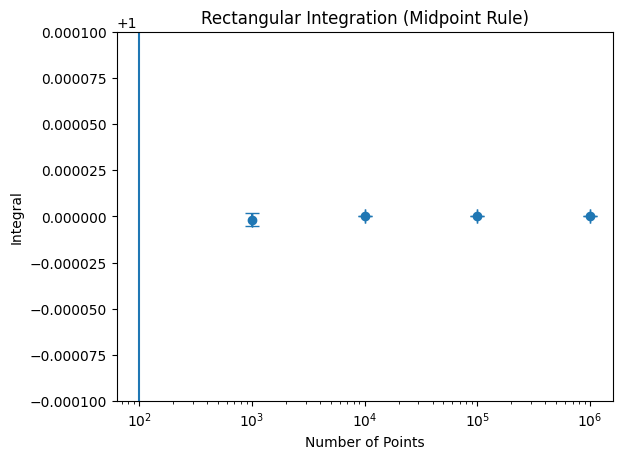

In [4]:
plt.errorbar(npts,sum2,xerr=enp,yerr=esum2,fmt='o',capsize=5)
plt.xscale("log")
plt.xlabel("Number of Points")
plt.ylabel("Integral")
plt.title("Rectangular Integration (Midpoint Rule)")
plt.ylim(0.9999,1.0001)
plt.show()

Slope = -1.998321


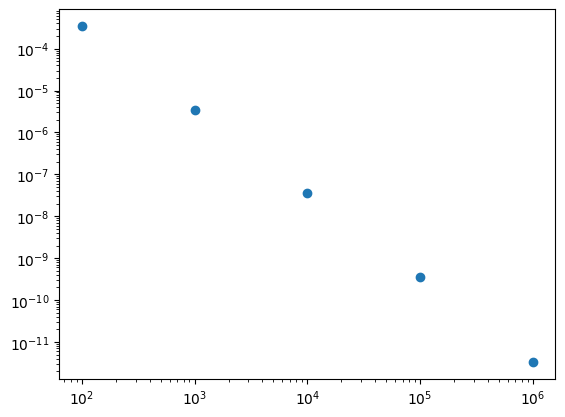

In [5]:
plt.plot(npts,esum2,'o')
plt.xscale("log")
plt.yscale("log")

slope = (np.log(esum2[1])-np.log(esum2[0]))/(np.log(npts[1])-np.log(npts[0]))
print("Slope = %f" %slope)